In [2]:
from sklearn.preprocessing import LabelBinarizer

In [3]:
from sklearn.metrics import classification_report
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD



In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
((trainX, trainY),(testX, testY)) =mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:

trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

In [8]:
trainX = trainX.astype("float32")/255.0
testX = testX.astype("float32")/255.0

In [9]:
lb= LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [10]:
model = Sequential()

In [11]:
model.add(Dense(256, input_shape=(784,), activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
sgd_optimizer = SGD(0.01)

In [13]:
model.compile(loss="categorical_crossentropy", optimizer=sgd_optimizer, metrics=["accuracy"])




In [14]:
H =model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=128)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4526 - loss: 1.8293 - val_accuracy: 0.8548 - val_loss: 0.5712
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8605 - loss: 0.5213 - val_accuracy: 0.8942 - val_loss: 0.3742
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8986 - loss: 0.3637 - val_accuracy: 0.9121 - val_loss: 0.3116
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9102 - loss: 0.3177 - val_accuracy: 0.9193 - val_loss: 0.2827
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9185 - loss: 0.2823 - val_accuracy: 0.9273 - val_loss: 0.2540
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9251 - loss: 0.2570 - val_accuracy: 0.9315 - val_loss: 0.2359
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9304 - loss: 0.2435 - val_accuracy: 0.9373 - val_loss: 0.2206
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9361 - loss: 0.2210 - val_accuracy: 0

In [15]:
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
  predictions.argmax(axis=1),
  target_names=[str(x) for x in lb.classes_]))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.96      0.95      0.96      1010
           4       0.96      0.96      0.96       982
           5       0.96      0.95      0.95       892
           6       0.96      0.97      0.96       958
           7       0.97      0.95      0.96      1028
           8       0.94      0.96      0.95       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



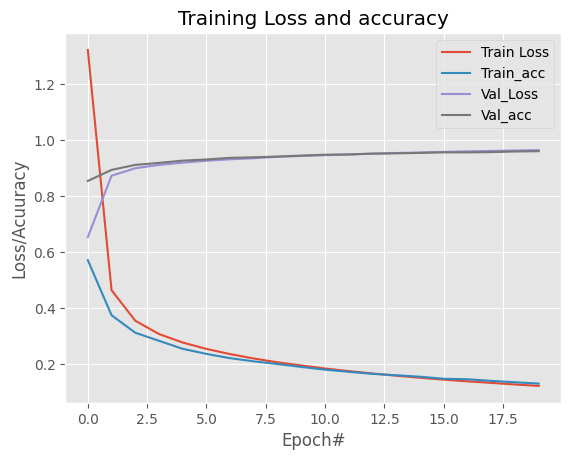

In [18]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,20), H.history["loss"], label="Train Loss")
plt.plot(np.arange(0,20), H.history["val_loss"], label="Train_acc")
plt.plot(np.arange(0,20), H.history["accuracy"], label="Val_Loss")
plt.plot(np.arange(0,20), H.history["val_accuracy"], label="Val_acc")
plt.title("Training Loss and accuracy")
plt.xlabel("Epoch#")
plt.ylabel("Loss/Acuuracy")
plt.legend()
plt.show()